## Data Exploration

In [ ]:
import torch
import matplotlib.pyplot as plt

from data_utils import ClassificationDataset, no_transforms

In [20]:
torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device(type='cuda')

In [2]:
train = ClassificationDataset('../data/train', transform=no_transforms)
val = ClassificationDataset('../data/valid', transform=no_transforms)
test = ClassificationDataset('../data/test', transform=no_transforms)
print(train.get_classes())
total_size = len(train) + len(val) + len(test)
print(f"Train size: {len(train)}; Proportion: {round(len(train)/total_size, 2)}")
print(f"Val size: {len(val)}; Proportion: {round(len(val)/total_size, 2)}")
print(f"Test size: {len(test)}; Proportion: {round(len(test)/total_size, 2)}")


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Train size: 90000; Proportion: 0.33
Val size: 90000; Proportion: 0.33
Test size: 90000; Proportion: 0.33


Dimensionality: torch.Size([3, 32, 32])


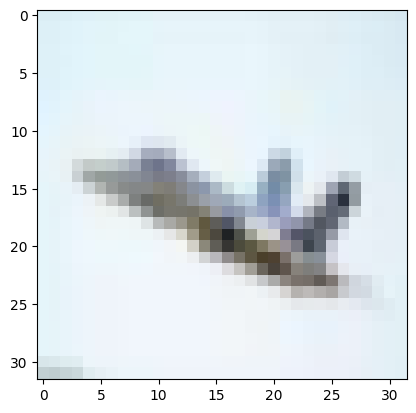

In [3]:
print(f"Dimensionality: {train[0][0].shape}")
# permute to change the order of the dimensions - imshow() expects the channel dimension to be the last one
plt.imshow(train[0][0].permute(1, 2, 0))
plt.show()

In [21]:
# calculate mean and std for normalization

print(f"Example calculation for the above image: {train[0][0].mean(dim=(1, 2)), train[0][0].std(dim=(1, 2))}")

# for whole dataset - merge all images into one tensor and calculate mean and std

all_images = torch.stack([img for img, _ in train])
# 0 - index, 1 - channel, 2 - height, 3 - width
# mean and std are calculated over all images, height and width
# so result is a tensor of size (channel,), so 3 values in this case 
train_mean = all_images.mean(dim=(0, 2, 3))
train_std = all_images.std(dim=(0, 2, 3))
print(f"Mean: {train_mean}, Std: {train_std}")

Example calculation for the above image: (tensor([0.8507, 0.8881, 0.9097]), tensor([0.1447, 0.1541, 0.1592]))
Mean: tensor([0.4789, 0.4723, 0.4305]), Std: tensor([0.2421, 0.2383, 0.2587])
